In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.src.engine.sequential import Sequential
#from keras.models import sequential
#from tensorflow.keras import Sequential
#from keras.engine.sequential import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

# Get data and pre-process it

In [2]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
def plot_input_img(i):
    #plt.imshow(x_train[i], cmap="binary")
    plt.imshow(x_train[i], cmap ="Greens", alpha = 0.7, 
           interpolation ='bilinear')
    plt.title(y_train[i])
    plt.show()

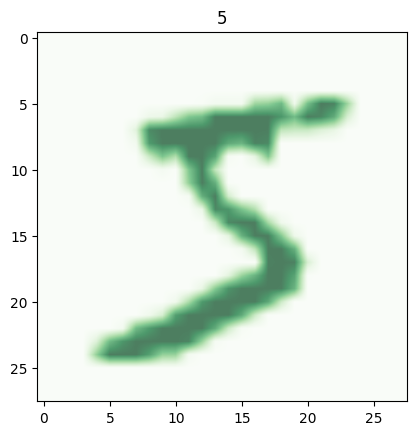

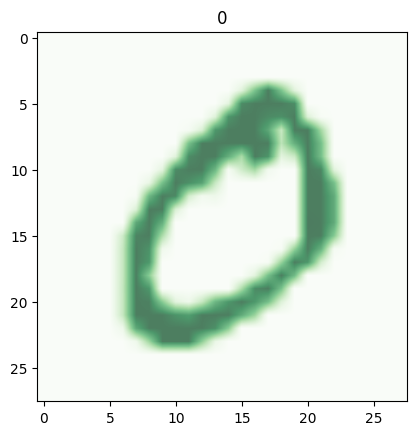

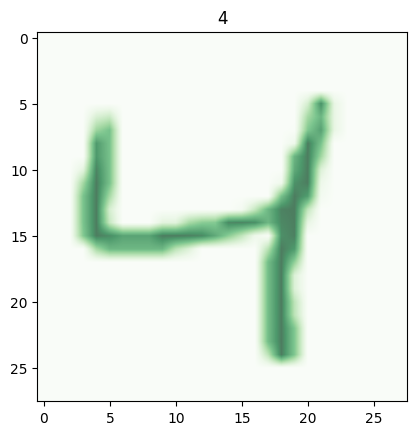

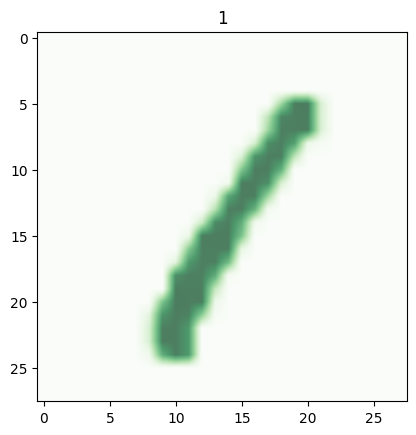

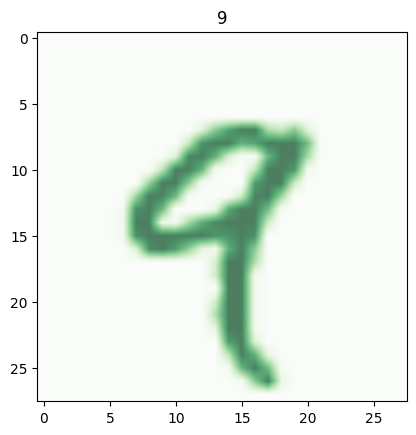

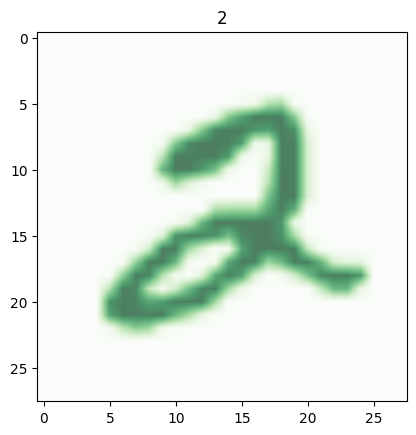

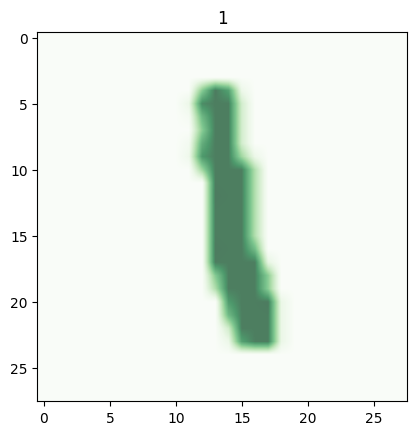

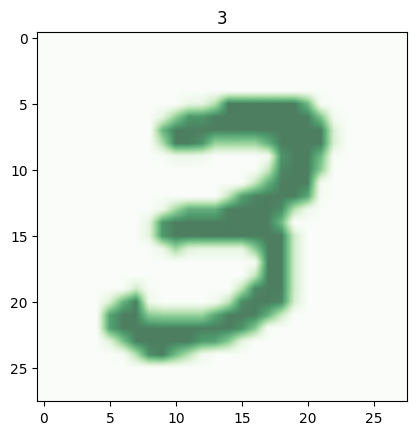

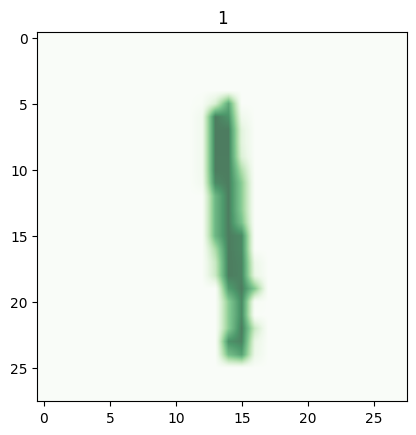

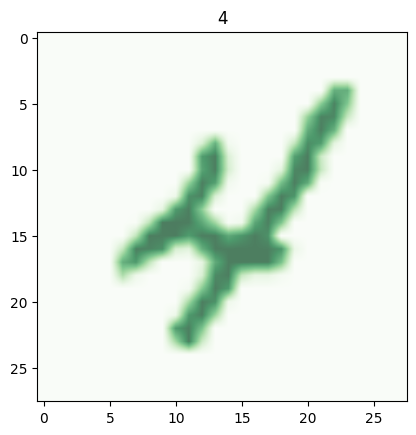

In [6]:
for i in range(10):
    plot_input_img(i)

In [7]:
# pre process the image
#normalizing the image to[0,1]  range
x_train=x_train.astype(np.float32)/255
x_test=x_test.astype(np.float32)/255

#Reshape  or expand the dimension of immages to (60000,28,28,1)
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
# convert classes to one hot vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [15]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [16]:
# callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStopping
es=EarlyStopping(monitor="val_acc",min_delta=0.01,patience=4,verbose=1)

#ModelCheckpoint
mc=ModelCheckpoint("./bestmodel.h5",monitor="val_acc",verbose=1,save_best_only=True)

cb=[es,mc]

In [17]:
his=model.fit(x_train,y_train,epochs=10,validation_split=0.3,callbacks=cb)

Epoch 1/10
1313/1313 [==============================] - 54s 40ms/step - loss: 0.2228 - accuracy: 0.9315 - val_loss: 0.0826 - val_accuracy: 0.9751
Epoch 2/10
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.0626 - val_accuracy: 0.9817
Epoch 3/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.0578 - val_accuracy: 0.9831
Epoch 4/10
1313/1313 [==============================] - 56s 42ms/step - loss: 0.0456 - accuracy: 0.9849 - val_loss: 0.0463 - val_accuracy: 0.9859
Epoch 5/10
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0444 - val_accuracy: 0.9868
Epoch 6/10
1313/1313 [==============================] - 58s 44ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0500 - val_accuracy: 0.9855
Epoch 7/10
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0418 -

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.034573767334222794
Test accuracy: 0.9894999861717224


In [21]:
#from keras.src.saving.saving_api import load_model
#model_S=tf.keras.models.load_model("bestmodel.h5")
model.save('bestmodel.h5')
print("Saving the model ")

Saving the model 
